<a href="https://colab.research.google.com/github/hussain0048/Projects/blob/master/Traffic_Sign_Classification_with_Keras_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

In the first part of this tutorial, we’ll discuss the concept of traffic sign classification and recognition, including the dataset we’ll be using to train our own custom traffic sign classifier.We’ll then implement TrafficSignNet, a Convolutional Neural Network which we’ll train on our dataset.

Given our trained model we’ll evaluate its accuracy on the test data and even learn how to make predictions on new input data as well.

#**What is traffic sign classification?**


Traffic sign classification is the process of automatically recognizing traffic signs along the road, including speed limit signs, yield signs, merge signs, etc. Being able to automatically recognize traffic signs enables us to build “smarter cars”.

Self-driving cars need traffic sign recognition in order to properly parse and understand the roadway. Similarly, “driver alert” systems inside cars need to understand the roadway around them to help aid and protect drivers.

Traffic sign recognition is just one of the problems that computer vision and deep learning can solve.

#  **Traffic sign dataset**

The dataset we’ll be using to train our own custom traffic sign classifier is the German Traffic Sign Recognition Benchmark (GTSRB).



The GTSRB dataset consists of 43 traffic sign classes and nearly 50,000 images.

In the real-world, traffic sign recognition is a two-stage process:

Localization: Detect and localize where in an input image/frame a traffic sign is.
Recognition: Take the localized ROI and actually recognize and classify the traffic sign.
Deep learning object detectors can perform localization and recognition in a single forward-pass of the network — if you’re interested in learning more about object detection and traffic sign localization using Faster R-CNNs, Single Shot Detectors (SSDs), and RetinaNet, be sure to refer to my book, Deep Learning for Computer Vision with Python, where I cover the topic in detail.

# **Challenges with the GTSRB dataset**

There are a number of challenges in the GTSRB dataset, the first being that images are low resolution, and worse, have poor contrast (as seen in Figure 2 above). These images are pixelated, and in some cases, it’s extremely challenging, if not impossible, for the human eye and brain to recognize the sign.

The second challenge with the dataset is handling class skew:

The top class (Speed limit 50km/h) has over 2,000 examples while the least represented class (Speed limit 20km/h) has under 200 examples — that’s an order of magnitude difference!

In order to successfully train an accurate traffic sign classifier we’ll need to devise an experiment that can:

Preprocess our input images to improve contrast.
Account for class label skew.

# **Configuring your development environment**


For this article, you’ll need to have the following packages installed:

1. OpenCV
2. NumPy
3. scikit-learn
4. scikit-image
5. imutils
6. matplotlib
7. TensorFlow 2.0 (CPU or GPU)

Luckily each of these is easily installed with pip, a Python package manager.

Let’s install the packages now, ideally into a virtual environment as shown (you’ll need to create the environment):

In [ ]:

!pip install opencv-contrib-python
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install imutils
!pip install matplotlib
!pip install tensorflow==2.0.0 # or tensorflow-gpu

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd



# **Load and Preprocess the Dataset**

Builten Dataset

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Manual dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Build the CNN Model**

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Train the CNN Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2946 - loss: 1.8912 - val_accuracy: 0.5412 - val_loss: 1.2760
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5352 - loss: 1.2955 - val_accuracy: 0.6002 - val_loss: 1.1188
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5982 - loss: 1.1299 - val_accuracy: 0.6436 - val_loss: 1.0131
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6461 - loss: 1.0070 - val_accuracy: 0.6768 - val_loss: 0.9281
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6787 - loss: 0.9132 - val_accuracy: 0.6920 - val_loss: 0.8874
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7028 - loss: 0.8407 - val_accuracy: 0.6983 - val_loss: 0.8657
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7259 - loss: 0.7901 - val_accuracy: 0.7039 - val_loss: 0.8593
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7417 - loss: 0.7437 - val_accuracy: 

# **Evaluate the Model**

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7306 - loss: 0.9086
Test Accuracy: 0.7266


# **Plot Training History**

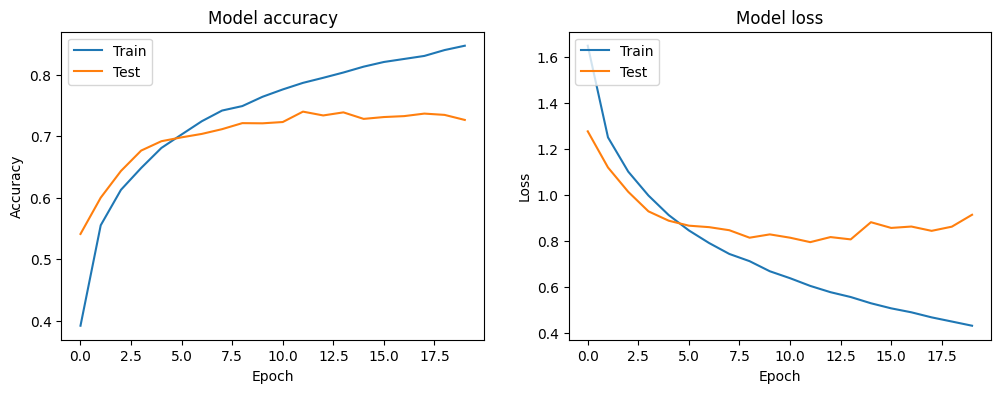

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# **Make Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


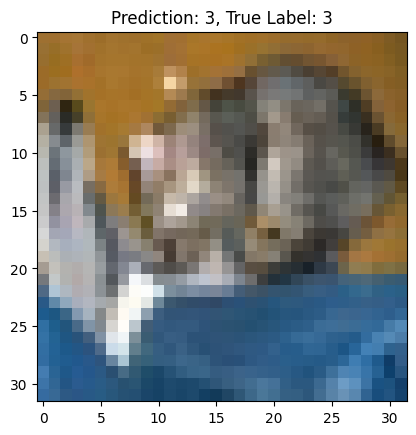

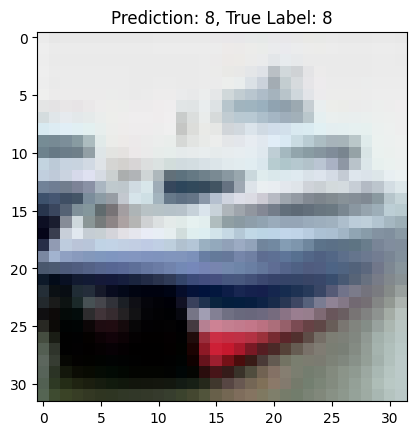

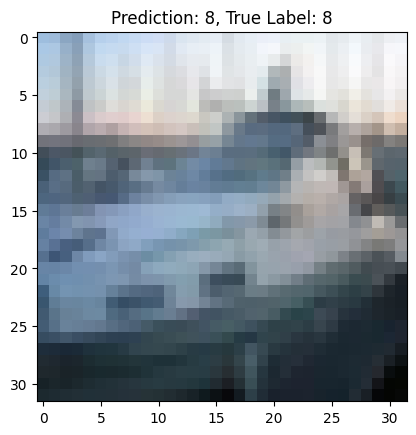

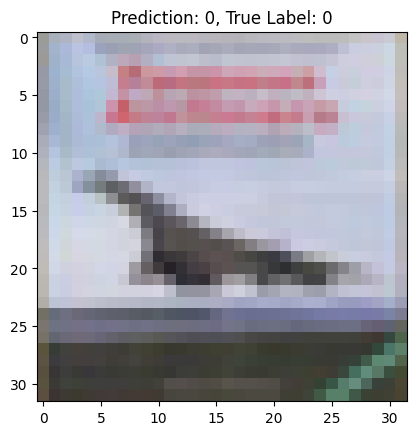

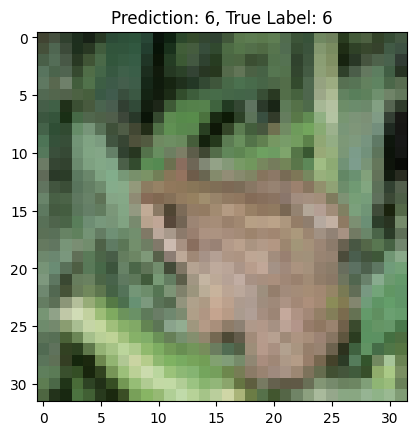

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Display some predictions with their corresponding true labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f'Prediction: {np.argmax(predictions[i])}, True Label: {np.argmax(y_test[i])}')
    plt.show()


# **Save the Model**

In [ ]:
# Save the trained model
model.save('traffic_sign_classifier.h5')


#**References**

[1-Traffic Sign Classification with Keras and Deep Learning](https://pyimagesearch.com/2019/11/04/traffic-sign-classification-with-keras-and-deep-learning/)

2-[2-Traffic Sign Classification with Convolutional Neural Networks](https://github.com/PavankumarUppar/Traffic-Sign-Classification-with-CNN)